# **TP INTEGRADOR - **

Al ejecutar el colab se:


- Obtiene la biografía de Leonardo da Vinci: Descarga el contenido HTML de una página web que contiene la biografía.
- Limpia y preprocesa el texto: Elimina caracteres especiales, convierte a minúsculas y realiza la lematización (obtiene la raíz de las palabras) para facilitar el análisis.
- Realiza análisis de frecuencia: Cuenta la frecuencia de cada palabra en el texto y crea una lista de las palabras más comunes.
- Visualiza los resultados: Genera una nube de palabras para visualizar las palabras más frecuentes y crea un DataFrame con información morfológica de las palabras (categoría gramatical, etiqueta, etc.). También visualiza las entidades nombradas (personas, lugares, organizaciones, etc.) y las dependencias sintácticas entre las palabras.

In [55]:
# Instalo las bibliotecas necesarias

!pip install requests beautifulsoup4 nltk wordcloud spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 43.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [56]:
# Importo las bibliotecas

import requests
import pandas as pd
import random
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from transformers import pipeline

# 1. Obtener el texto de la biografía

In [57]:
# Defino la URL de la biografía

url = "https://www.biografiasyvidas.com/monografia/leonardo/"

# Obtengo la página web

response = requests.get(url)

# Creo un objeto BeautifulSoup para analizar el HTML

soup = BeautifulSoup(response.text, 'html.parser')

# Extraigo el texto de los párrafos

text = ""
for parrafo in soup.find_all("p"):
    text += str(parrafo.getText())

article_divs = soup.find_all('div', class_='article')

# Itero sobre los divs con la clase 'article' y extraer los párrafos para elegir uno aleatorio

for article_div in article_divs:
    p_tags = article_div.find_all('p', class_=lambda class_name: class_name != 'piefotos')  # Buscar todos los <p> dentro de este div

parrafo_aleatorio = random.choice(p_tags)
parrafo = parrafo_aleatorio.text

In [58]:
print(text)

Considerado el paradigma del homo universalis, del sabio renacentista versado en todos los ámbitos del conocimiento humano, Leonardo da Vinci (1452-1519) 
incursionó en campos tan variados como la aerodinámica, la hidráulica, la anatomía, la botánica, la pintura,
la escultura y la arquitectura, entre otros. Sus investigaciones científicas fueron, en gran medida, olvidadas y minusvaloradas por sus contemporáneos;
su producción pictórica, en cambio, fue de inmediato reconocida como la de un maestro capaz de materializar el ideal de belleza en obras
de turbadora sugestión y delicada poesía.
Recreación de un retrato de LeonardoEn el plano artístico, Leonardo conforma, junto con Miguel Ángel y Rafael,
la tríada de los grandes maestros del Cinquecento, y,
pese a la parquedad de su obra, la historia de la pintura lo cuenta entre sus mayores genios. Por los demás, es posible que de la poderosa fascinación
que suscitan sus obras maestras (con La Gioconda a la cabeza) proceda aquella otra fascin

In [59]:
print(parrafo)

A partir de 1517 su salud, hasta entonces inquebrantable, comenzó a desmejorar. Su brazo derecho quedó paralizado; pero, con su incansable
mano izquierda, Leonardo aún hizo bocetos de proyectos urbanísticos, de drenajes de ríos y hasta decorados para las fiestas palaciegas.
Convertida en una especie de museo, su casa de Amboise estaba repleta de los papeles y apuntes que contenían las ideas de este hombre excepcional,
muchas de las cuales deberían esperar siglos para demostrar su factibilidad y aun su necesidad; llegó incluso, en esta época, a concebir
la idea de hacer casas prefabricadas. Sólo por las tres telas que eligió para que lo acompañasen en su última etapa (San
Juan Bautista, La Gioconda y Santa Ana, la Virgen y el Niño) puede decirse que Leonardo poseía entonces uno de los
grandes tesoros de su tiempo.


# 2. Limpiar el texto

In [60]:
# Elimino una subcadena específica si existe

substring_a_borrar = ", los sacramentos."
index = text.find(substring_a_borrar)
if index != -1:
    text = text[:index + len(substring_a_borrar)]

# Convierto a minúsculas, eliminar caracteres especiales y espacios adicionales del texto y el párrafo

text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
text = re.sub(r'\s+', ' ', text)

parrafo = parrafo.lower()
parrafo = re.sub(r'[^\w\s]', '', parrafo)
parrafo = re.sub(r'\s+', ' ', parrafo)

In [61]:
print(text)
print(parrafo)

considerado el paradigma del homo universalis del sabio renacentista versado en todos los ámbitos del conocimiento humano leonardo da vinci 14521519 incursionó en campos tan variados como la aerodinámica la hidráulica la anatomía la botánica la pintura la escultura y la arquitectura entre otros sus investigaciones científicas fueron en gran medida olvidadas y minusvaloradas por sus contemporáneos su producción pictórica en cambio fue de inmediato reconocida como la de un maestro capaz de materializar el ideal de belleza en obras de turbadora sugestión y delicada poesía recreación de un retrato de leonardoen el plano artístico leonardo conforma junto con miguel ángel y rafael la tríada de los grandes maestros del cinquecento y pese a la parquedad de su obra la historia de la pintura lo cuenta entre sus mayores genios por los demás es posible que de la poderosa fascinación que suscitan sus obras maestras con la gioconda a la cabeza proceda aquella otra fascinación en torno a su figura qu

# 3. Lematización con spaCy

In [62]:
# Cargo el modelo en español de spaCy

nlp = spacy.load('es_core_news_sm')

# Descargo las stop words en español

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Proceso el texto con spaCy

doc = nlp(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# No Filtrado

lemmas_no_filtrados = [token.lemma_ for token in doc if token.is_alpha]

counter_no_filtrado = Counter(lemmas_no_filtrados)
print("SIN FILTRO : ", counter_no_filtrado)

SIN FILTRO :  Counter({'el': 292, 'de': 233, 'en': 101, 'su': 91, 'y': 88, 'uno': 70, 'que': 69, 'él': 63, 'a': 50, 'leonardo': 43, 'del': 39, 'para': 39, 'por': 38, 'como': 33, 'ser': 31, 'con': 28, 'no': 16, 'este': 16, 'más': 15, 'haber': 14, 'poco': 13, 'pintura': 12, 'gran': 12, 'año': 11, 'último': 10, 'obra': 9, 'hacer': 9, 'entonces': 8, 'al': 8, 'hasta': 8, 'nuevo': 8, 'todo': 7, 'maestro': 7, 'sólo': 7, 'san': 7, 'pero': 7, 'milán': 7, 'otro': 6, 'grande': 6, 'alguno': 6, 'florencia': 6, 'poder': 6, 'además': 6, 'modelo': 6, 'cuadro': 6, 'dibujo': 6, 'período': 6, 'proyecto': 6, 'sobre': 6, 'virgen': 6, 'boceto': 6, 'humano': 5, 'dar': 5, 'vinci': 5, 'entre': 5, 'retrato': 5, 'junto': 5, 'gioconda': 5, 'siglo': 5, 'hijo': 5, 'aún': 5, 'mucho': 5, 'padre': 5, 'vez': 5, 'propio': 5, 'primero': 5, 'estudio': 5, 'c': 5, 'ciudad': 5, 'convertir': 5, 'cuyo': 5, 'hombre': 5, 'proyectar': 5, 'tratado': 5, 'anatomía': 4, 'ángel': 4, 'rafael': 4, 'contar': 4, 'después': 4, 'italia': 4,

In [64]:
# Filtrado

agregar_stop_words =["ser","haber","gran","hacer","entonces","dar","junto","aún","vez","propio","c","cuyo","proyectar","tratado","además","último","alguno","siglo","año","san","vinci","ciudad"]

lemmas_filtrados = [
    token.lemma_
    for token in doc
    if token.lemma_ not in stop_words and token.is_alpha
    and token.pos_ != "VERB"
    and token.lemma_ not in agregar_stop_words
]

counter_filtrado = Counter(lemmas_filtrados)
print("CON FILTRO : ",counter_filtrado)

CON FILTRO :  Counter({'leonardo': 43, 'pintura': 12, 'obra': 9, 'nuevo': 8, 'maestro': 7, 'sólo': 7, 'milán': 7, 'grande': 6, 'florencia': 6, 'poder': 6, 'modelo': 6, 'cuadro': 6, 'dibujo': 6, 'período': 6, 'proyecto': 6, 'virgen': 6, 'boceto': 6, 'humano': 5, 'retrato': 5, 'gioconda': 5, 'hijo': 5, 'padre': 5, 'primero': 5, 'estudio': 5, 'hombre': 5, 'anatomía': 4, 'ángel': 4, 'rafael': 4, 'después': 4, 'italia': 4, 'corte': 4, 'niño': 4, 'taller': 4, 'verrocchio': 4, 'mecánico': 4, 'santa': 4, 'bautista': 4, 'extraordinario': 4, 'escena': 4, 'casi': 4, 'apunte': 4, 'ciencia': 4, 'tiempo': 4, 'encargo': 4, 'francesco': 4, 'hacia': 4, 'versión': 4, 'casa': 4, 'idea': 4, 'etapa': 4, 'conocimiento': 3, 'escultura': 3, 'arquitectura': 3, 'científico': 3, 'pictórico': 3, 'ideal': 3, 'mayor': 3, 'genio': 3, 'florentino': 3, 'venecia': 3, 'papa': 3, 'romano': 3, 'esplendor': 3, 'dos': 3, 'inspirado': 3, 'observación': 3, 'pintor': 3, 'artista': 3, 'iglesia': 3, 'maria': 3, 'fuerza': 3, 'jov

# 4. Análisis de frecuencia de palabras

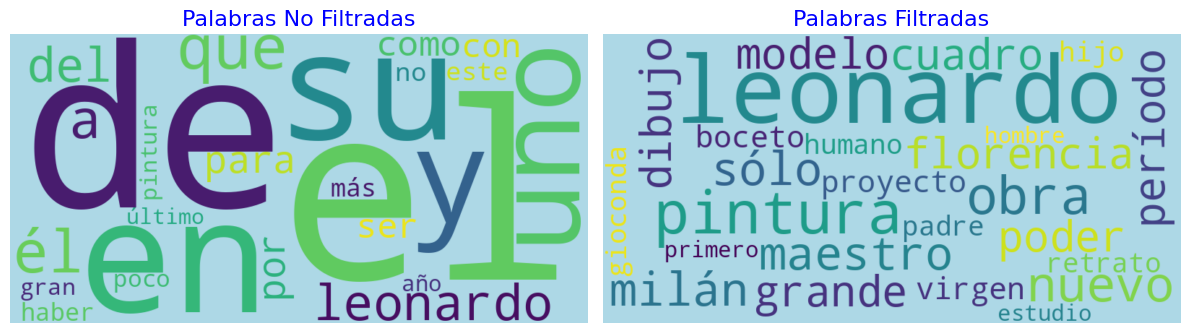

In [65]:
# Diccionario con las 25 palabras mas comunes

top_25_no_filtrado = dict(counter_no_filtrado.most_common(25))
top_25_filtrado = dict(counter_filtrado.most_common(25))

# Creo las Word Clouds

wordcloud_no_filtrados = WordCloud(width=800, height=400, background_color="lightblue").generate_from_frequencies(top_25_no_filtrado)
wordcloud_filtrados = WordCloud(width=800, height=400, background_color="lightblue").generate_from_frequencies(top_25_filtrado)

# Muestro las dos nubes de palabras en el mismo gráfico

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_no_filtrados, interpolation="bilinear")
plt.title("Palabras No Filtradas", fontsize=16, color='blue')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_filtrados, interpolation="bilinear")
plt.title("Palabras Filtradas", fontsize=16, color='blue')
plt.axis("off")

plt.subplots_adjust(wspace=10)

# Muestro los gráficos

plt.tight_layout()
plt.show()

# 5. Creación del DataFrame con información morfológica

In [66]:
# Creo una lista de diccionarios con información de cada token de un párrafo

doc_parrafo = nlp(parrafo)

tokens_data = []

for token in doc_parrafo:
    if not token.is_space:
        tokens_data.append({
            "Token": token.text,
            "Lema": token.lemma_,
            "Categoría Gramatical": spacy.explain(token.pos_),
            "Etiqueta": token.tag_,
            "Dependencia": spacy.explain(token.dep_),
            "Cabeza": token.head.text
        })
# Creo un DataFrame a partir de la lista de diccionarios

df_token = pd.DataFrame(tokens_data)

# Muestro todas las filas del DataFrame

pd.options.display.max_rows = None
df_token

,Token,Lema,Categoría Gramatical,Etiqueta,Dependencia,Cabeza
0,a,a,adposition,ADP,case marking,1517
1,partir,partir,noun,NOUN,fixed multiword expression,a
2,de,de,adposition,ADP,fixed multiword expression,a
3,1517,1517,noun,NOUN,oblique nominal,comenzó
4,su,su,determiner,DET,determiner,salud
5,salud,salud,noun,NOUN,nominal subject,comenzó
6,hasta,hasta,adposition,ADP,case marking,entonces
7,entonces,entonces,adverb,ADV,adverbial modifier,inquebrantable
8,inquebrantable,inquebrantable,adjective,ADJ,adjectival modifier,salud
9,comenzó,comenzar,verb,VERB,root,comenzó


# 6. Visualización de entidades

In [67]:
# Visualizo las entidades nombradas en el texto

displacy.render(doc_parrafo, style='ent', jupyter=True, options={'compact': True, 'distance': 100})

# 7. Visualización de dependencias

In [68]:
displacy.render(doc_parrafo, style='dep', jupyter=True, options={'distance': 200, 'color': 'blue', 'bg': 'white', 'font': 'Arial'})

# 8. Categorización de palabras

In [69]:
# Lista para almacenar los datos de los sustantivos

tokens_data = []

# Recorro los tokens y selecciono solo los sustantivos

for token in doc_parrafo:
    if not token.is_space and token.pos_ == "NOUN":
        tokens_data.append({
            "Token": token.text,
            "Lema": token.lemma_,
            "Categoría Gramatical": spacy.explain(token.pos_),
            "Etiqueta": token.tag_,
            "Dependencia": spacy.explain(token.dep_),
            "Cabeza": token.head.text
        })

# Crear un DataFrame a partir de la lista de diccionarios

df_token = pd.DataFrame(tokens_data)

# Mostrar todas las filas del DataFrame

pd.options.display.max_rows = None

In [70]:
lista_palabras = df_token["Token"].tolist()
print(lista_palabras)

['partir', '1517', 'salud', 'brazo', 'mano', 'bocetos', 'proyectos', 'drenajes', 'ríos', 'fiestas', 'especie', 'museo', 'casa', 'papeles', 'apuntes', 'ideas', 'hombre', 'siglos', 'factibilidad', 'necesidad', 'época', 'idea', 'casas', 'telas', 'etapa', 'niño', 'tesoros', 'tiempo']


In [74]:
# Creo el clasificador

clasificador = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Categorías posibles

categorias = [
    "arte", "tecnología", "música", "política","salud",
    "ciencia", "historia", "educación", "sociedad",
    "astronomía", "física", "biología", "geografía", "filosofía", "religión", "cultura"
              ]

# Función para predecir la categoría

def predecir_categoria_huggingface(palabra):
    resultado = clasificador(palabra, candidate_labels=categorias)
    return resultado['labels'][0]

# Creo una lista vacia para que se agreguen las categorías

categ = []

for palabra in lista_palabras:
    categ.append(predecir_categoria_huggingface(palabra))
    print(f"La palabra '{palabra}' pertenece a la categoría: {predecir_categoria_huggingface(palabra)}")

print(categ)

Device set to use cpu


La palabra 'partir' pertenece a la categoría: arte
La palabra '1517' pertenece a la categoría: historia
La palabra 'salud' pertenece a la categoría: salud
La palabra 'brazo' pertenece a la categoría: biología
La palabra 'mano' pertenece a la categoría: música
La palabra 'bocetos' pertenece a la categoría: biología
La palabra 'proyectos' pertenece a la categoría: arte
La palabra 'drenajes' pertenece a la categoría: arte
La palabra 'ríos' pertenece a la categoría: astronomía
La palabra 'fiestas' pertenece a la categoría: sociedad
La palabra 'especie' pertenece a la categoría: arte
La palabra 'museo' pertenece a la categoría: arte
La palabra 'casa' pertenece a la categoría: sociedad
La palabra 'papeles' pertenece a la categoría: arte
La palabra 'apuntes' pertenece a la categoría: arte
La palabra 'ideas' pertenece a la categoría: arte
La palabra 'hombre' pertenece a la categoría: biología
La palabra 'siglos' pertenece a la categoría: física
La palabra 'factibilidad' pertenece a la categorí

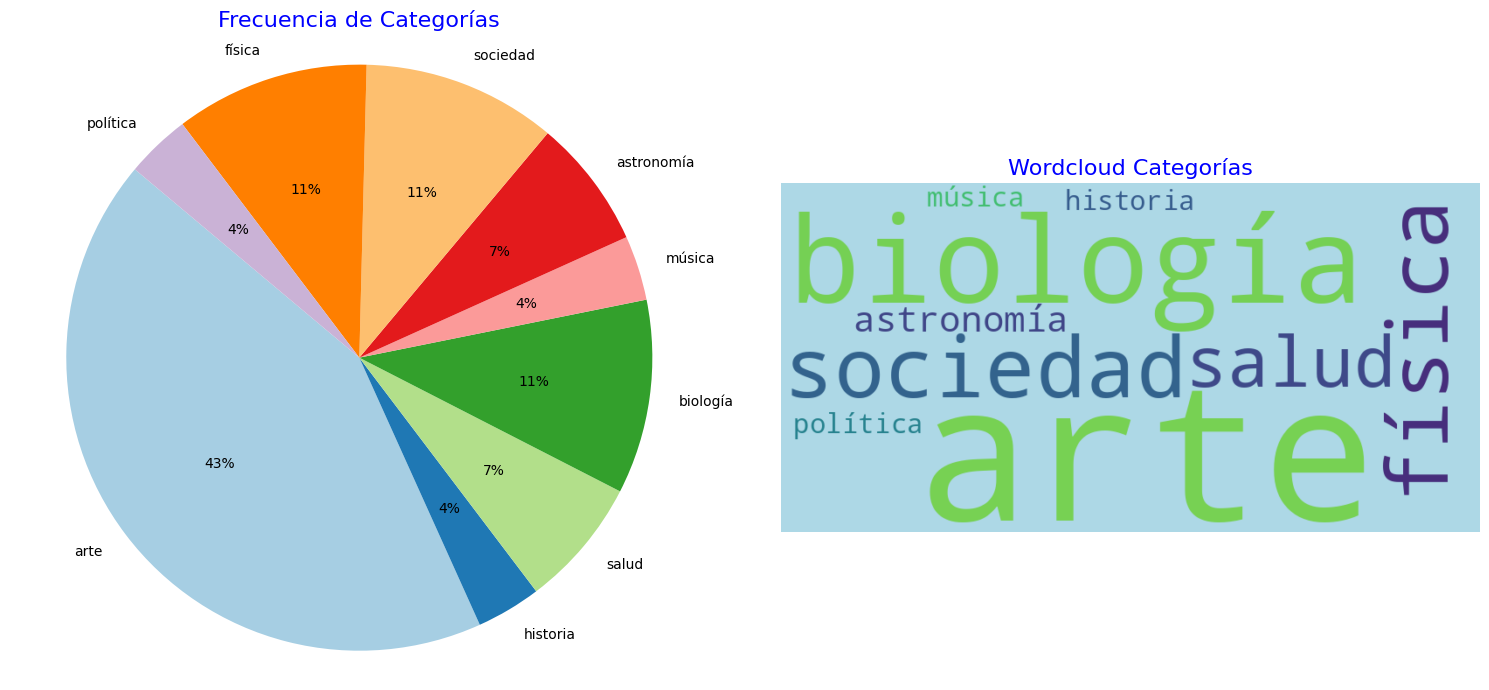

In [75]:
frecuencias = Counter(categ)

# Creo los gráficos

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

labels = frecuencias.keys()
sizes = frecuencias.values()
axes[0].pie(sizes, labels=labels, autopct='%1.0f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title("Frecuencia de Categorías", fontsize=16, color='blue')
axes[0].axis('equal')

wordcloud = WordCloud(width=800, height=400, background_color="lightblue").generate_from_frequencies(frecuencias)
plt.title("Wordcloud Categorías", fontsize=16, color='blue')
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis("off")

# Muestro los gráficos

plt.tight_layout()
plt.show()